#카메라 스티커앱 만들기

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
my_image_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration3/ye_.jpg'
print(my_image_path)

/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration3/ye_.jpg


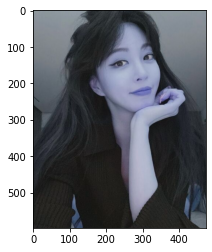

In [170]:
img_bgr = cv2.imread(my_image_path)
plt.imshow(img_bgr)
plt.show()

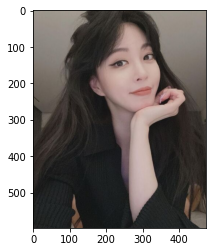

In [171]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

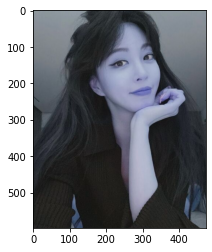

In [172]:
img_show = img_rgb.copy()
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

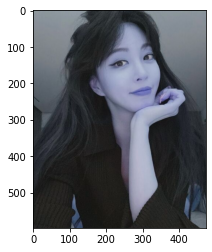

In [167]:
sticker = img_rgb.copy()
sticker = cv2.cvtColor(sticker, cv2.COLOR_BGR2RGB)
plt.imshow(sticker)

## dlib 라이브러리를 통해 얼굴을 검출한다.

In [150]:
import dlib
detector_hog = dlib.get_frontal_face_detector() 
#  dlib.get_frontal_face_detector() 함수를 통해 detector_hog에 face detector를 담음.

In [151]:
dlib_rects = detector_hog(img_rgb, 1)

# 사진마다 얼굴사이즈가 다르다
# 얼굴사이즈를 측정해서 스티커 사이즈를 그에맞게 조절한다.
# 마스크를 얼굴사이즈에 맞게 붙여야한다.

rectangles[[(180, 77) (366, 263)]]


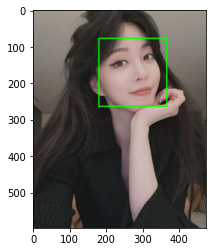

In [154]:
print(dlib_rects)

for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()

  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Dlib landmark localization
* dlib에는 얼굴 이미지에서 68개 지점을 찾아준다.

In [117]:
import os
model_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration3/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

[(167, 171), (174, 195), (184, 217), (197, 237), (216, 252), (238, 261), (263, 267), (288, 271), (309, 266), (323, 259), (331, 244), (337, 227), (343, 209), (347, 190), (348, 170), (343, 150), (334, 132), (200, 132), (211, 119), (227, 109), (246, 106), (264, 109), (294, 103), (302, 95), (313, 92), (322, 92), (330, 97), (286, 135), (292, 148), (298, 160), (305, 173), (285, 195), (294, 195), (303, 194), (309, 191), (314, 187), (222, 150), (234, 141), (247, 139), (260, 146), (249, 151), (235, 153), (300, 137), (308, 125), (319, 122), (327, 127), (322, 133), (311, 136), (266, 229), (283, 220), (298, 212), (306, 212), (312, 209), (320, 211), (325, 215), (322, 224), (316, 230), (309, 233), (301, 235), (286, 235), (272, 228), (299, 222), (306, 221), (312, 218), (321, 217), (313, 218), (307, 221), (300, 222)]


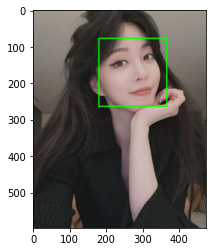

In [130]:
for dlib_rect in dlib_rects:
  points = landmark_predictor(img_show_rgb, dlib_rect)
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  print(list_points)
  list_landmarks.append(list_points)
plt.imshow(img_show_rgb)
plt.show()

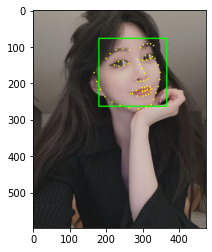

In [131]:
for landmark in list_landmarks:
  for idx, point in enumerate(list_points):
    cv2.circle(img_show, point, 2, (0, 255, 255), -1)

  img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img_show_rgb)

## 얼굴에 붙일 스티커 사진 로드 및 위치 인덱싱

![landmark localization](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png "landmark localization")

인물의 위치나 얼굴의 각도 등 다양한 요소에 따라 알맞게  스티커가 붙을 수 있도록 landmark 기반 인덱싱을 진행했다.   
세로는 1 - 4, 가로는 4 - 16으로 인덱싱을 적용했다.

In [132]:
import os
sticker_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration3/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)

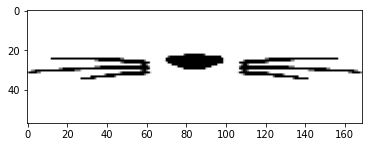

In [133]:
sticker_resize= cv2.resize(img_sticker, (landmark[15][0] - landmark[1][0], landmark[4][1]-landmark[1][1]))
plt.imshow(sticker_resize)

In [134]:
sticker_area = img_show_rgb[landmark[1][1]:landmark[4][1], landmark[1][0]:landmark[15][0]]

In [135]:
img_show_rgb[landmark[1][1]:landmark[4][1], landmark[1][0]:landmark[15][0]] = np.where(sticker_resize==255, sticker_area, sticker_resize)

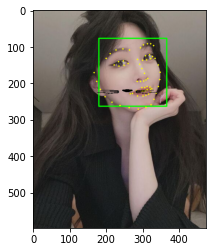

In [136]:
plt.imshow(img_show_rgb)

In [144]:
print(landmark[1][1])
print(landmark[4][1])
print(landmark[1][0])
print(landmark[15][0])

195
252
174
343


In [175]:
sticker_area = img_rgb[195:252, 174:343]
img_rgb[195:252, 174:343] = np.where(sticker_resize==255, sticker_area, sticker_resize)

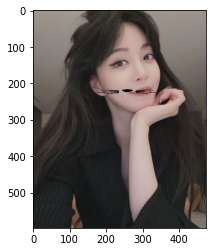

In [176]:
plt.imshow(img_rgb)